!pip install BeautifulSoup4, lxml, pandas, requests, IPython, googlemaps

In [1]:
from urllib.request import urlopen
import json,config
from bs4 import BeautifulSoup
import googlemaps


In [2]:
gmaps = googlemaps.Client(key=config.google_api_key)

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_arenas"

In [4]:
page = urlopen(url)

In [5]:
soup = BeautifulSoup(page, "lxml")

In [6]:
first_table = soup.find('table', class_= 'wikitable')

In [7]:
A=[] #IMG
B=[] #Arena
C=[] #City
D=[] #Team
E=[] #Capacity
F=[] #Opened
G=[] #state

In [8]:
for row in first_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==7:
        A.append(cells[0].find('img')['src'].replace("120px", "250px"))
        B.append(cells[1].find(text=True))
        #this splits the city and state then puts them in their own arrays.
        location = cells[2].find(text=True).split(',')

        C.append(location[0])
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True).rstrip('\n'))
        F.append(cells[5].find(text=True).rstrip('\n'))
        G.append(location[1].lstrip())

In [9]:
import pandas as pd

df=pd.DataFrame(D,columns=['Team'])
df['Arena']= B
df['City'] = C
df['State']= G
df['Capacity']= E
df['opened']= F
df['image']= A
df

,Team,Arena,City,State,Capacity,opened,image
0,Dallas Mavericks,American Airlines Center,Dallas,Texas,"19,200",2001,//upload.wikimedia.org/wikipedia/commons/thumb...
1,Orlando Magic,Amway Center,Orlando,Florida,"18,846",2010,//upload.wikimedia.org/wikipedia/commons/thumb...
2,San Antonio Spurs,AT&T Center,San Antonio,Texas,"18,418",2002,//upload.wikimedia.org/wikipedia/commons/thumb...
3,Denver Nuggets,Ball Arena,Denver,Colorado,"19,520",1999,//upload.wikimedia.org/wikipedia/commons/thumb...
4,Brooklyn Nets,Barclays Center,Brooklyn,New York,"17,732",2012,//upload.wikimedia.org/wikipedia/commons/thumb...
5,Washington Wizards,Capital One Arena,Washington,D.C.,"20,356",1997,//upload.wikimedia.org/wikipedia/commons/thumb...
6,Golden State Warriors,Chase Center,San Francisco,California,"18,064",2019,//upload.wikimedia.org/wikipedia/commons/thumb...
7,Los Angeles Clippers,Crypto.com Arena,Los Angeles,California,"19,068",1999,//upload.wikimedia.org/wikipedia/commons/thumb...
8,Memphis Grizzlies,FedExForum,Memphis,Tennessee,"17,794",2004,//upload.wikimedia.org/wikipedia/commons/thumb...
9,Milwaukee Bucks,Fiserv Forum,Milwaukee,Wisconsin,"17,500",2018,//upload.wikimedia.org/wikipedia/commons/thumb...


In [10]:
location = [];
for i in range(len(B)):
    searchTerm = B[i] + ", " + C[i] + ", " + G[i]
    geocode_result = gmaps.geocode(searchTerm)
    data = geocode_result[0]['geometry']['location']
    tempArray = []
    tempArray.append(float(data['lng']))
    tempArray.append(float(data['lat']))
    location.append(tempArray[::-1])


In [11]:
final_data = []

In [12]:
for i in range(len(A)):
    temp={}
    temp['Image'] = "HTTPS:" + A[i]
    temp['Team'] = D[i]
    temp['Arena'] = B[i]
    temp['Location'] = C[i] + ", "+ G[i]
    temp['Capacity'] = E[i]
    temp['opened'] = F[i]
    temp['Coordinates'] = location[i]
    final_data.append(temp)
    

In [16]:
print(final_data[14])

{'Image': 'HTTPS://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Little_Caesars_Arena_panorama.jpg/250px-Little_Caesars_Arena_panorama.jpg', 'Team': 'Detroit Pistons', 'Arena': 'Little Caesars Arena', 'Location': 'Detroit, Michigan', 'Capacity': '20,332', 'opened': '2017', 'Coordinates': [42.3411026, -83.0552673]}


In [14]:
with open('NBA.json', 'w') as outfile:
    json.dump(final_data, outfile)

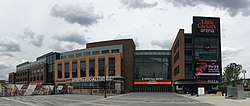

In [17]:
import requests
import IPython.display as Disp
url = final_data[14]['Image']
Disp.Image(requests.get(url).content)